In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [70]:
train = pd.read_csv(r'D:\kaggle\datasets\digit-recognizer\train.csv')
test  = pd.read_csv(r'D:\kaggle\datasets\digit-recognizer\test.csv')

In [71]:
train.shape

(42000, 785)

In [75]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
X_train = train.values[:,1:]
Y_train = train.values[:,0]
test=test.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [77]:
test.shape

(28000, 784)

In [19]:
# Normalization
X_train = X_train / 255.0
test = test / 255.0

In [20]:
X_train.shape

(42000, 784)

In [78]:
X_train = X_train.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)

In [79]:
X_train.shape

(42000, 28, 28, 1)

In [80]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

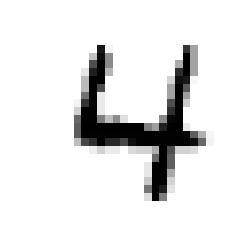

In [81]:
plot_digit(X_train[42])

In [98]:
from keras import layers
from keras import models

model = models.Sequential()
#对于黑白图像（比如 MNIST 数字图像），深度等于 1（表示灰度等级）。
#学到的就是在输入图像的二维小窗口中发现的模式。这些窗口的大小都是 3×3。
#Conv2D(output_depth,(window_height, window_width))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [99]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [100]:
#将 3D 输出展平为 1D，然后在上面添加几个 Dense 层
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [101]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [83]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
random_seed = 42
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

In [84]:
X_train.shape

(37800, 28, 28, 1)

In [85]:
Y_train.shape

(37800,)

In [86]:

Y_val.shape

(4200,)

In [87]:
X_val.shape

(4200, 28, 28, 1)

In [88]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)

In [102]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(X_train,Y_train,epochs=5,batch_size=64,validation_data=(X_val,Y_val))

Epoch 1/5
591/591 [==============================] - 3s 4ms/step - loss: 0.4122 - accuracy: 0.9220 - val_loss: 0.1001 - val_accuracy: 0.9738
Epoch 2/5
591/591 [==============================] - 2s 4ms/step - loss: 0.0713 - accuracy: 0.9796 - val_loss: 0.0503 - val_accuracy: 0.9833
Epoch 3/5
591/591 [==============================] - 2s 4ms/step - loss: 0.0493 - accuracy: 0.9867 - val_loss: 0.0601 - val_accuracy: 0.9831
Epoch 4/5
591/591 [==============================] - 2s 4ms/step - loss: 0.0370 - accuracy: 0.9892 - val_loss: 0.0653 - val_accuracy: 0.9843
Epoch 5/5
591/591 [==============================] - 2s 4ms/step - loss: 0.0315 - accuracy: 0.9913 - val_loss: 0.0760 - val_accuracy: 0.9819


In [115]:
results = model.predict(test)

In [116]:
results = np.argmax(results,axis = 1)

In [117]:
results[1]

0

In [118]:
results = pd.Series(results, name = 'Label')

In [120]:
results.head()

0    2
1    0
2    9
3    9
4    3
Name: Label, dtype: int64

In [121]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)

In [114]:
test.shape

(28000, 28, 28, 1)